<a href="https://colab.research.google.com/github/ravianandfbg/Stock-price-prediction-Apple-/blob/master/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program uses an artificial recurrent neural etwork called Long Short Term Memory (LSTM)
#               to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [ ]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [ ]:
#Get the stock quote 
df = web.DataReader('AAPL', data_source='yahoo', start='2020-01-01', end='2025-12-17') 
#Show the data 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,300.600006,295.190002,296.239990,300.350006,33870100.0,298.829956
2020-01-03,300.579987,296.500000,297.149994,297.429993,36580700.0,295.924713
2020-01-06,299.959991,292.750000,293.790009,299.799988,29596800.0,298.282715
2020-01-07,300.899994,297.480011,299.839996,298.390015,27218000.0,296.879883
2020-01-08,304.440002,297.160004,297.160004,303.190002,33019800.0,301.655548
...,...,...,...,...,...,...
2020-07-14,389.019989,375.510010,379.359985,388.230011,42747300.0,388.230011
2020-07-15,396.989990,385.959991,395.959991,390.899994,38299500.0,390.899994
2020-07-16,389.619995,383.619995,386.250000,386.089996,27644400.0,386.089996


In [ ]:
df.shape

(138, 6)

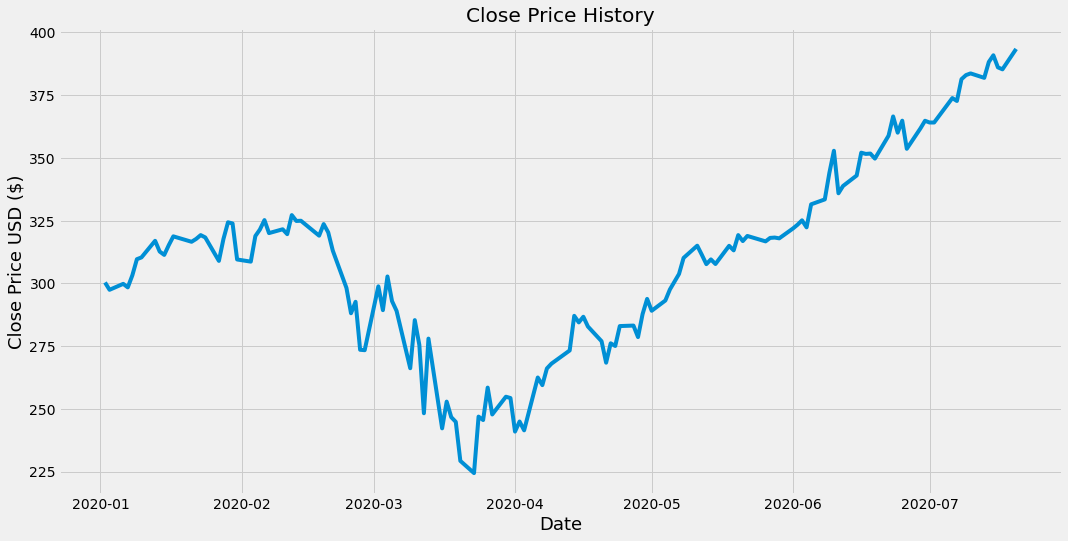

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [ ]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 

In [ ]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [ ]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [ ]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
51/51 [==============================] - 3s 57ms/step - loss: 0.0166


In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [ ]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

11.033645483071966

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


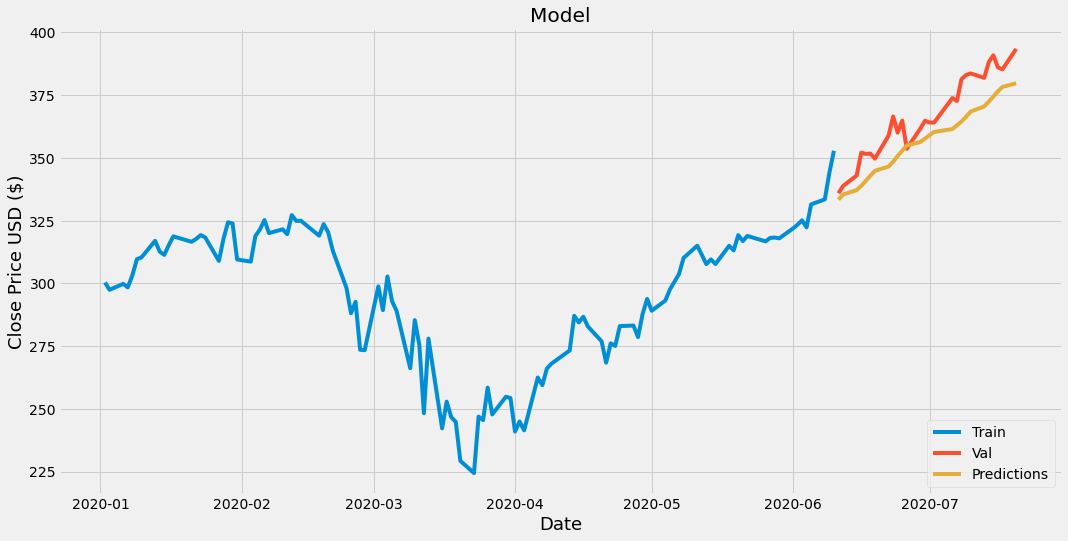

In [ ]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-06-11,335.899994,333.385559
2020-06-12,338.799988,335.408142
2020-06-15,342.989990,337.170471
2020-06-16,352.079987,338.868347
2020-06-17,351.589996,340.868378
2020-06-18,351.730011,342.897736
2020-06-19,349.720001,344.853607
2020-06-22,358.869995,346.563965
2020-06-23,366.529999,348.490448


In [ ]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2020-01-01', end='2025-12-17')

#Create a new dataframe
new_df = apple_quote.filter(['Close'])

#Get teh last 60 day closing price 
last_60_days = new_df[-60:].values

#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

#Create an empty list
X_test = []

#Append teh past 60 days
X_test.append(last_60_days_scaled)

#Convert the X_test data set to a numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Get the predicted scaled price
pred_price = model.predict(X_test)

#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[381.34506]]


In [ ]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2021-08-27', end='2021-08-27')
print(apple_quote2['Close'])

Date
2019-12-18    279.739990
2019-12-19    280.019989
2019-12-20    279.440002
2019-12-23    284.000000
2019-12-24    284.269989
                 ...    
2020-07-14    388.230011
2020-07-15    390.899994
2020-07-16    386.089996
2020-07-17    385.309998
2020-07-20    393.429993
Name: Close, Length: 147, dtype: float64
